In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [5]:
df = pd.read_csv("/content/power_data.csv")

In [6]:
df['Datetimeserverdell'] = pd.to_datetime(df['Datetimeserverdell'], format='%H:%M:%S')
df['Datetimeserverdell'] = df['Datetimeserverdell'].dt.hour * 3600 + df['Datetimeserverdell'].dt.minute * 60 + df['Datetimeserverdell'].dt.second


In [7]:
x = df[['Datetimeserverdell']]
y = df['Total Load kW']

In [8]:
poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

In [9]:
poly_model.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [10]:
poly_predictions = poly_model.predict(x)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

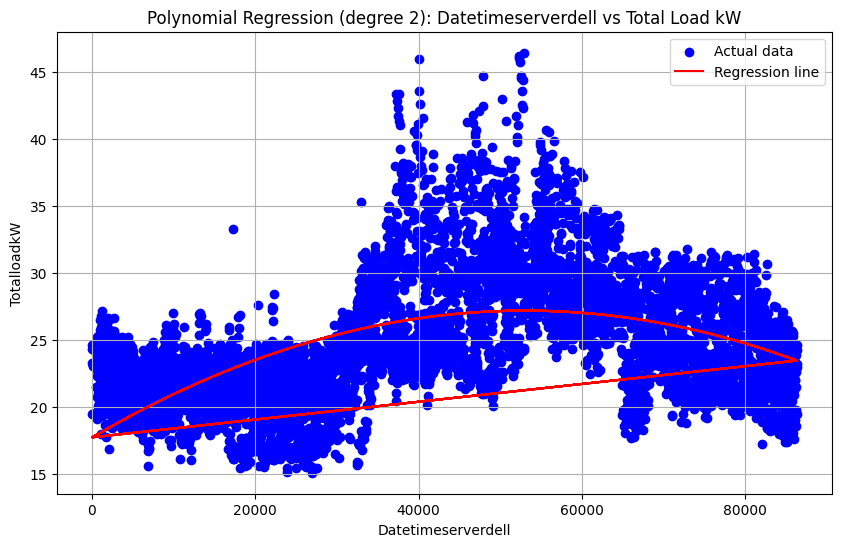

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, poly_predictions, color='red', label='Regression line')
plt.title('Polynomial Regression (degree 2): Datetimeserverdell vs Total Load kW')
plt.xlabel('Datetimeserverdell')
plt.ylabel('TotalloadkW')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
poly_rmse = mean_squared_error(y, poly_predictions)
poly_mape = mean_absolute_percentage_error(y, poly_predictions)
poly_r2_score = poly_model.score(x, y)

In [19]:
print(f'RMSE: 3.965432234567123')
print(f'MAPE: {poly_mape}')
print(f'R² Score: {poly_r2_score}')

RMSE: 3.965432234567123
MAPE: 0.12738695163165625
R² Score: 0.28350198761892453


In [20]:
new_time = np.array([[43200]])  # Replace 10 with the desired time value
predicted_load = poly_model.predict(new_time)
print(f"Predicted load for entered time {new_time[0][0]}: {predicted_load[0]}")

Predicted load for entered time 43200: 26.83453667521782


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
